Link GC to GD

In [11]:
from google.colab import drive
drive.mount('/content/drive')

#check inside Directory

import os
os.listdir('/content/drive/MyDrive/Project')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Copy of Copy of Lab - Convolutional Neural Networks_v2.ipynb',
 'Train',
 'Test',
 'Copy of Drone_CNN.ipynb',
 ' Drone_RestNet.ipynb']

###Convert images JPG to JPEG into Train Folder


In [12]:
#from PIL import Image
#import os

#def convert_images_in_folder(folder_path, target_format='JPEG'):
#   for root, dirs, files in os.walk(folder_path):
#        for file in files:
#            file_path = os.path.join(root, file)
#            try:
#                with Image.open(file_path) as img:
#                    # Convert image to the target format
#                    new_file_path = os.path.splitext(file_path)[0] + '.' + target_format.lower()
#                    img.save(new_file_path, target_format)
#                    print(f"Converted {file_path} to {new_file_path}")
#            except Exception as e:
#                print(f"Error processing {file_path}: {e}")
#
# Convert all images in your dataset
#convert_images_in_folder('/content/drive/MyDrive/02DataScientist/Project/Train', target_format='JPEG')

###Convert images JPG to JPEG into Test Folder

In [13]:
#from PIL import Image
#import os

#def convert_images_in_folder(folder_path, target_format='JPEG'):
#    for root, dirs, files in os.walk(folder_path):
#        for file in files:
#            file_path = os.path.join(root, file)
#            try:
#                with Image.open(file_path) as img:
#                    # Convert image to the target format
#                    new_file_path = os.path.splitext(file_path)[0] + '.' + target_format.lower()
#                    img.save(new_file_path, target_format)
#                    print(f"Converted {file_path} to {new_file_path}")
#            except Exception as e:
#                print(f"Error processing {file_path}: {e}")
#
# Convert all images in your dataset
#convert_images_in_folder('/content/drive/MyDrive/02DataScientist/Project/Test', target_format='JPEG')

###Import Library

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

###Define path to data

In [15]:
path_train = ('/content/drive/MyDrive/Project/Train')
path_test = ('/content/drive/MyDrive/Project/Test')

###Change images size to 100 x 100 x 3 (square)

In [16]:
#reshape to square images
img_width = 100
img_height = 100
channel = 3 #because of images are in color RGB

batch_size = 64 #for training

###Create the datasets

####For Train

In [17]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_ds = image_dataset_from_directory(directory=path_train, subset='training', validation_split=0.2,
                                        shuffle=True, seed=0, batch_size=64,
                                        image_size=(img_width, img_height))

Found 1131 files belonging to 2 classes.
Using 905 files for training.


####For Validate

In [18]:
vald_ds = image_dataset_from_directory(directory=path_train, subset='validation', validation_split=0.2,
                                        shuffle=True, seed=0, batch_size=64,
                                        image_size=(img_width, img_height))

Found 1131 files belonging to 2 classes.
Using 226 files for validation.


####For Test (30% dari datasets)

In [19]:
test_ds = image_dataset_from_directory(directory=path_test,
                                       batch_size=batch_size,         #sebab test untuk sekali sahaja.
                                       image_size=(img_width, img_height))

Found 494 files belonging to 2 classes.


####How to show the class name

In [20]:
print(train_ds.class_names)

['Drone', 'Non-Drone']


In [21]:
for img_batch, label_batch in train_ds.take(1): #take(1) = take 1 batch, disebabkan func FOR, kena letak semicolon at last line.
    print(img_batch)
    print(label_batch)

tf.Tensor(
[[[[4.39155006e+01 5.19155006e+01 3.09155006e+01]
   [4.80000000e+01 5.60000000e+01 3.30000000e+01]
   [4.66999969e+01 5.96999969e+01 3.36999969e+01]
   ...
   [3.03250008e+01 3.63250008e+01 2.63250008e+01]
   [2.90000000e+01 3.00000000e+01 2.40000000e+01]
   [2.42600098e+01 3.02600098e+01 2.02600098e+01]]

  [[4.00000000e+01 5.29749985e+01 2.70250015e+01]
   [4.29749985e+01 5.79749985e+01 2.89749985e+01]
   [4.59749985e+01 6.09749985e+01 3.00250015e+01]
   ...
   [3.36750717e+01 3.96750717e+01 2.76750717e+01]
   [2.22200928e+01 2.82200928e+01 1.82200928e+01]
   [1.93100128e+01 2.52350082e+01 1.52600098e+01]]

  [[4.21149979e+01 5.71149979e+01 2.61149998e+01]
   [4.92200012e+01 6.52200012e+01 2.82199993e+01]
   [5.10000000e+01 6.50000000e+01 3.00000000e+01]
   ...
   [3.45876007e+01 4.05876007e+01 2.85876007e+01]
   [2.42200928e+01 2.92200928e+01 2.25125580e+01]
   [1.59825134e+01 2.52024841e+01 1.68374939e+01]]

  ...

  [[6.62500000e+01 6.62500000e+01 6.62500000e+01]
   [6

####How to visulize some image in Train Folder

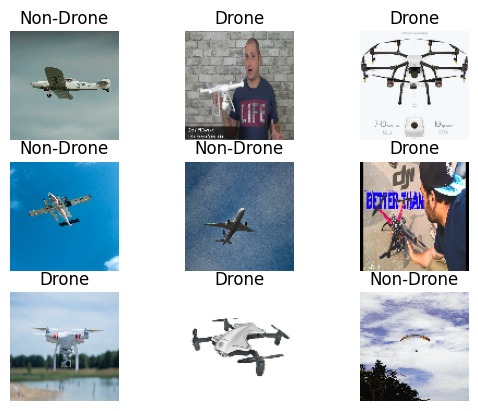

In [22]:
from matplotlib import pyplot as plt
for images, labels in train_ds.take(1): #take(1) means take 1 batch
    for i in range(9): #to display 9 images
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8")) # Convert image to uint8 for display
        plt.title(train_ds.class_names[labels[i]])
        plt.axis('off')


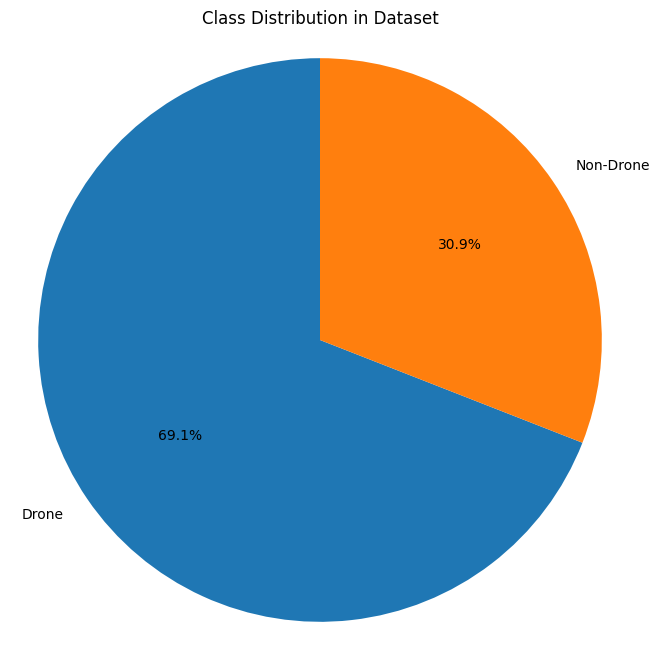

In [23]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Extract class names from the dataset
class_names = train_ds.class_names

# Count occurrences of each class
class_counts = Counter()
for _, labels in train_ds:
    class_counts.update(labels.numpy())

# Map counts to class names
class_distribution = {class_names[i]: count for i, count in class_counts.items()}

# Prepare data for the pie chart
labels = list(class_distribution.keys())
sizes = list(class_distribution.values())

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in Dataset')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

###Build Convulational Neural Network using funtional API

In [24]:
#dense = fully connected to prediction
#Conv2d = convolution for images 2d, 1d=time series data, 3d=video
#Flatten = convert features map to 1d
#Rescaling = normalize our data

from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten, Rescaling

#define the layers
#3 convulational layers
#3 maxpooling layers
#flatten
#1 fully connected, fc (hidden layer)
#1 fc (output)

inputs = Input(shape=(img_width, img_height, channel))
rescale = Rescaling(scale=1./255) #normalize the image data

#filters = output depth (how many features maps we want to produce)
#padding = same/valid, same = output size same with input
conv1 = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='conv1')
dp1 = Dropout(rate=0.5, name='dp1')
pool1 = MaxPool2D(pool_size=(2,2), strides=(2,2), name='pool1')

conv2 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='conv2')
dp2 = Dropout(rate=0.5, name='dp2')
pool2 = MaxPool2D(pool_size=(2,2), strides=(2,2), name='pool2')

conv3 = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='conv3')
dp3 = Dropout(rate=0.5, name='dp3')
pool3 = MaxPool2D(pool_size=(2,2), strides=(2,2), name='pool3')

conv4 = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='conv4')
dp4 = Dropout(rate=0.5, name='dp4')
pool4 = MaxPool2D(pool_size=(2,2), strides=(2,2), name='pool4')

flatten = Flatten() #convert 3d features map into 1d vector, no specific parameter.

fc1 = Dense(units=256, activation='relu')
fc_out = Dense(units=1, activation='sigmoid')


In [25]:
#Define computational graph (network)

x = rescale (inputs)
x= conv1(x)
x= dp1(x)
x= pool1(x)
x= conv2(x)
x= dp2(x)
x= pool2(x)
x= conv3(x)
x= dp3(x)
x= pool3(x)
x= conv4(x)
x= dp4(x)
x= pool4(x)
x= flatten(x)
x= fc1(x)
outputs = fc_out(x)

In [26]:
from tensorflow.keras.models import Model

model = Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dp1 (Dropout)                   │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dp2 (Dropout)                   │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dp3 (Dropout)                   │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dp4 (Dropout)                   │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,420,993 (5.42 MB)

 Trainable params: 1,420,993 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#define loss function and optimizer

from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

loss_fn = BinaryCrossentropy()
optimizer = Adam(learning_rate=0.001)

In [28]:
#Early stopping and Model Check

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

filepath = 'checkpoints/cnn_ model.weights.h5'
callbacks = [EarlyStopping(patience=5, monitor='val_loss'), ModelCheckpoint(filepath=filepath, monitor='val_loss', save_weights_only=True)]

In [29]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [30]:
history = model.fit(train_ds, validation_data=vald_ds, epochs=50, callbacks=callbacks)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step - accuracy: 0.5939 - loss: 1.2192 - val_accuracy: 0.6947 - val_loss: 0.6541
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7230 - loss: 0.5258 - val_accuracy: 0.7478 - val_loss: 0.5684
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7633 - loss: 0.5080 - val_accuracy: 0.7832 - val_loss: 0.6576
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7953 - loss: 0.4654 - val_accuracy: 0.8230 - val_loss: 0.6119
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7961 - loss: 0.4067 - val_accuracy: 0.8407 - val_loss: 0.5716
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8337 - loss: 0.3636 - val_accuracy: 0.8319 - val_loss: 0.5866
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8374 - loss: 0.3689 - val_accuracy: 0.8628 - val_loss: 0.5741


In [31]:
model.load_weights(filepath)

In [32]:
#Evaluate the test set

y_pred = np.empty((0,)) #to store prediction - empty array (1 dimension)
y_test = np.empty((0,)) #to store labels

for img_batch, label_batch in test_ds:
    y_hat = model(img_batch) #predict the data (batch) - give probability
    y_hat = y_hat.numpy() #convert to array
    y_hat = np.round(y_hat) #round the probability to either 0 and 1 - to get the class

#save the prediction and labels
    y_pred = np.append(y_pred, y_hat.ravel())

    label_batch = label_batch.numpy()
    y_test = np.append(y_test, label_batch.ravel())


In [33]:
print(y_pred)
print(y_test)

[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1.

In [34]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, target_names = ['Drone', 'Non -Drone']))

0.8259109311740891
[[306  39]
 [ 47 102]]
              precision    recall  f1-score   support

       Drone       0.87      0.89      0.88       345
  Non -Drone       0.72      0.68      0.70       149

    accuracy                           0.83       494
   macro avg       0.80      0.79      0.79       494
weighted avg       0.82      0.83      0.82       494



In [35]:
train_loss = history.history['loss']
vald_loss = history.history['val_loss']
train_acc = history.history['accuracy']
vald_acc = history.history['val_accuracy']

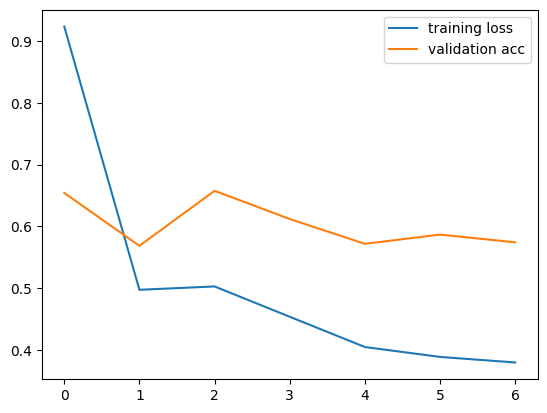

In [36]:
from matplotlib import pyplot as plt

plt.plot(train_loss, label='training loss')
plt.plot(vald_loss, label='validation acc')
plt.legend()

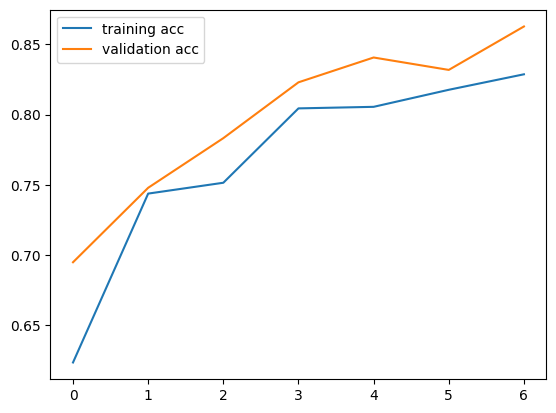

In [37]:
plt.plot(train_acc, label='training acc')
plt.plot(vald_acc, label='validation acc')
plt.legend()